In [2]:
from statsbombpy import sb

In [3]:
# SETUP
# Data from World Cup 2022
matches = sb.matches(competition_id=43, season_id=106)
# 3857297 - Poland vs Saudi Arabia match ID
events = sb.events(match_id=3857297)
#events.info()

C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [343]:
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\Aleks\AppData\Local\Temp\ipykernel_26136\578755785.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_kiwior["start_x"] = [location[0] for location in passes_kiwior["location"]]
C:\Users\Aleks\AppData\Local\Temp\ipykernel_26136\578755785.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_kiwior["start_y"] = [location[1] for location in passes_kiwior["location"]]


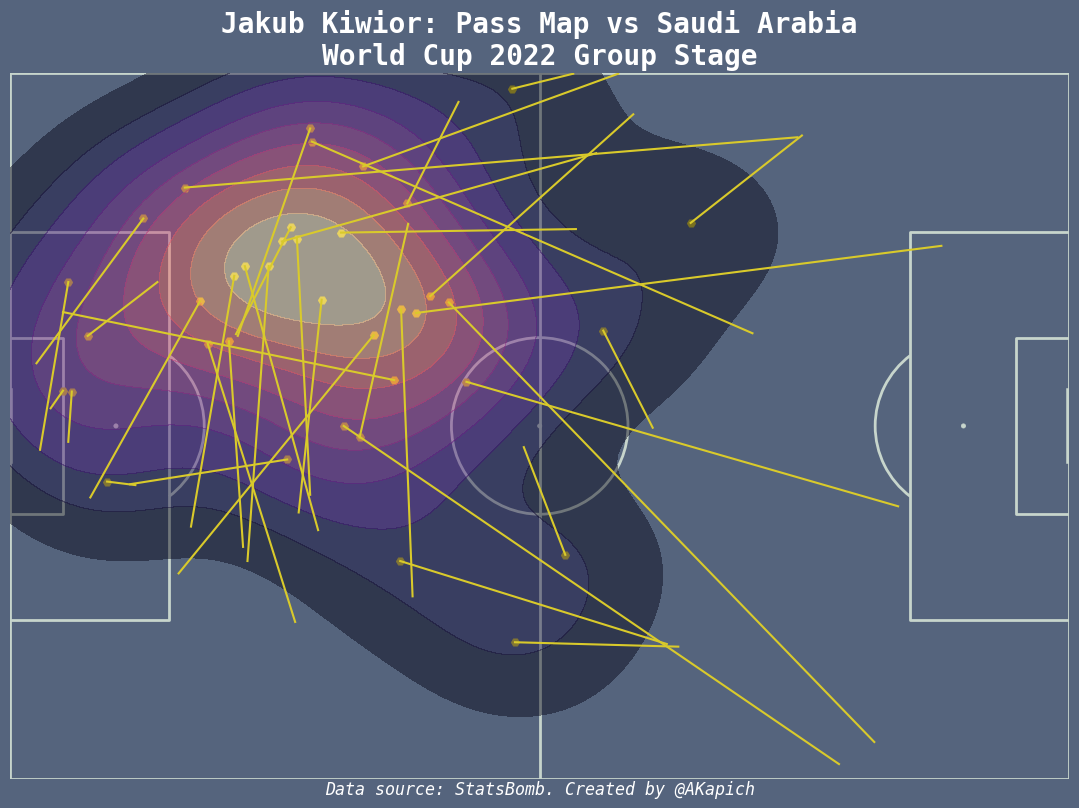

In [461]:
# Passes from Poland - Saudi Arabia Match
passes = sb.events(match_id=3857297, split=True, flatten_attrs=False)["passes"]
passes_kiwior = passes[passes.player=="Jakub Piotr Kiwior"]
passes_kiwior.index = range(len(passes_kiwior))

fig ,ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
fig.set_facecolor('#55647d')
ax.patch.set_facecolor('#55647d')
pitch = Pitch(pitch_type='statsbomb', pitch_color='#55647d', line_color='#c7d5cc')
#Draw the pitch on the ax figure
pitch.draw(ax=ax)

passes_kiwior["start_x"] = [location[0] for location in passes_kiwior["location"]]
passes_kiwior["start_y"] = [location[1] for location in passes_kiwior["location"]]
#plt.plot((startx, endx), (starty, endy))
for i in range(len(passes_kiwior)):
    plt.plot((passes_kiwior["start_x"][i], passes_kiwior["pass"][i]['end_location'][0]),
             (passes_kiwior["start_y"][i], passes_kiwior["pass"][i]['end_location'][1]),
             color='#d9ca2b')
    plt.scatter(passes_kiwior["location"][i][0], passes_kiwior["location"][i][1],
                color='#d9ca2b', marker='H')
    
#Heatmap
kde = sns.kdeplot(
        x=passes_kiwior["start_x"],
        y=passes_kiwior["start_y"],
        fill = True,
        shade_lowest=False,
        alpha=.45,
        n_levels=10,
        cmap = 'magma'
)
plt.xlim(0,120)
plt.ylim(80,0)
plt.title('Jakub Kiwior: Pass Map vs Saudi Arabia\nWorld Cup 2022 Group Stage',
          color='white', size=20,  fontweight="bold", family="monospace")
fig.text(.5, .0001, "Data source: StatsBomb. Created by @AKapich",
        fontstyle='italic', fontsize=12, fontfamily='Monospace', color='w', ha='center')
plt.savefig('kiwior_passmap.png',dpi = 500, bbox_inches='tight',facecolor='#55647d')

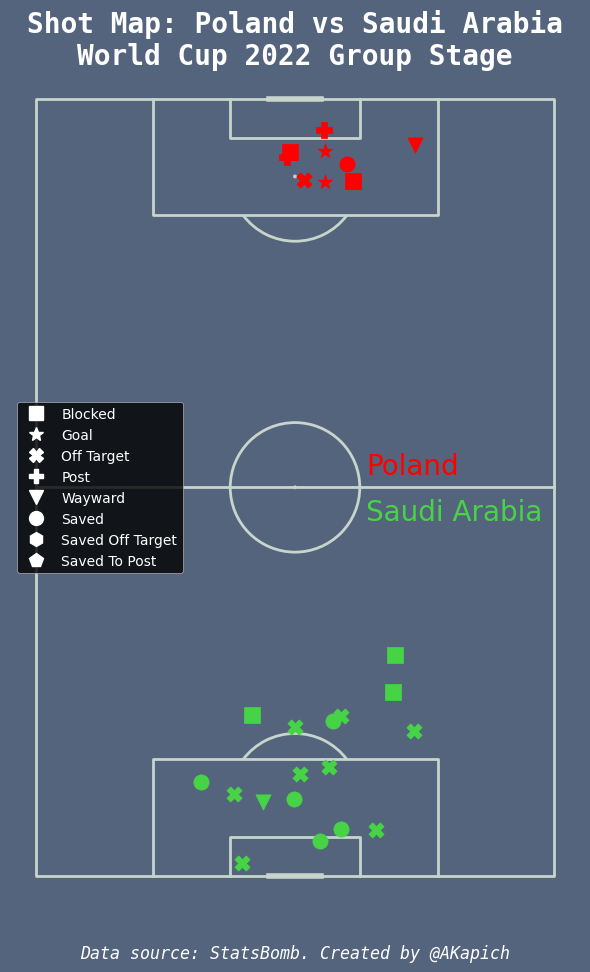

In [339]:
from matplotlib.lines import Line2D
outcome_dict = {
    "Blocked":"s",
    "Goal" : "*",
    "Off T": "X",
    "Post": "P",
    "Saved":"o",
    "Wayward":"v",
    "Saved Off T":"h",
    "Saved To Post":"p"
}

fig,ax = plt.subplots(figsize=(6, 9.75),constrained_layout=False, tight_layout=True)
fig.set_facecolor('#55647d')
ax.patch.set_facecolor('#55647d')
# vertical pitch!
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#55647d', line_color='#c7d5cc')
pitch.draw(ax=ax)

shots = sb.events(match_id=3857297, split=True, flatten_attrs=False)["shots"]
shots["start_x"] = [location[0] for location in shots["location"]]
shots["start_y"] = [location[1] for location in shots["location"]]
shots.index = range(len(shots))

for i in range(len(shots)):
    if(shots.iloc[i].team=="Poland"):
        plt.scatter(shots["start_y"][i], shots["start_x"][i],
                    color="red",
                    marker=outcome_dict[shots["shot"][i]["outcome"]["name"]],
                    s=120)
    else:
        # vertical pitch, therefore y and coords exchanged
        plt.scatter(80-shots["start_y"][i], 120-shots["start_x"][i],
                    color="#46d446",
                    marker=outcome_dict[shots["shot"][i]["outcome"]["name"]],
                    s=120)   

legend_elements=[Line2D([], [], marker='s', linestyle='None', markersize=10, label='Blocked'),
                Line2D([], [], marker='*', linestyle='None', markersize=10, label='Goal'),
                Line2D([], [], marker='X', linestyle='None', markersize=10, label='Off Target'),
                Line2D([], [], marker='P', linestyle='None', markersize=10, label='Post'),
                 Line2D([], [], marker='v', linestyle='None', markersize=10, label='Wayward'),
                Line2D([], [], marker='o', linestyle='None', markersize=10, label='Saved'),
                Line2D([], [], marker='h', linestyle='None', markersize=10, label='Saved Off Target'),
                Line2D([], [], marker='p', linestyle='None', markersize=10, label='Saved To Post')]
plt.legend(handles=legend_elements, loc='center left')
plt.text(51, 62, 'Poland', fontsize = 20, color="red")
plt.text(51, 55, 'Saudi Arabia', fontsize = 20, color="#46d446")

plt.title('Shot Map: Poland vs Saudi Arabia\nWorld Cup 2022 Group Stage',
          color='white', size=20,  fontweight="bold", family="monospace")
fig.text(.5, .01, "Data source: StatsBomb. Created by @AKapich",
         fontstyle='italic', fontsize=12, fontfamily='Monospace', color='w', ha='center')
plt.savefig('shotmap.png', dpi = 500, bbox_inches='tight',facecolor='#55647d')

In [462]:
passes = sb.events(match_id=3857297, split=True, flatten_attrs=False)["passes"]
passes = passes[passes.team=="Poland"]
passes.index = range(len(passes))

# We take only the surname
passes["player"] = [x.split(" ")[-1] for x in passes["player"]]
# We filter out only successful passes
passes["recipient"] = [passes["pass"][i]["recipient"]["name"].split(" ")[-1] # we take only the surname
                       if list(passes.iloc[i]["pass"].keys())[0]=="recipient"
                       else None
                       for i in range(len(passes))]
passes = passes[passes["recipient"]!=None]

# Chart may be created for the time until the first substitution
events = sb.events(match_id=3857297)
subs = events[pd.isna(events["substitution_outcome"])==False]
min_threshold = min(subs["minute"])
sec_threshold = min(subs["second"])
#subs[["minute", "second"]]
passes = passes[(passes["minute"]<min_threshold) |
                ((passes["minute"]==min_threshold) & (passes["second"]<sec_threshold))]


passes["x"] = [location[0] for location in passes["location"]]
passes["y"] = [location[1] for location in passes["location"]]
average_location = passes.groupby('player').agg({'x': ['mean'], 'y': ['mean','count']})
average_location.columns = ['x', 'y', 'count']
average_location

,x,y,count
player,,,
Bereszyński,68.900000,4.289474,19
Bielik,49.742857,47.307143,14
Cash,57.134783,70.452174,23
Frankowski,71.450000,44.933333,12
Glik,29.757143,55.452381,21
Kiwior,33.318182,22.213636,22
Krychowiak,57.085714,37.885714,14
Lewandowski,78.470000,41.740000,10
Milik,72.800000,35.087500,8


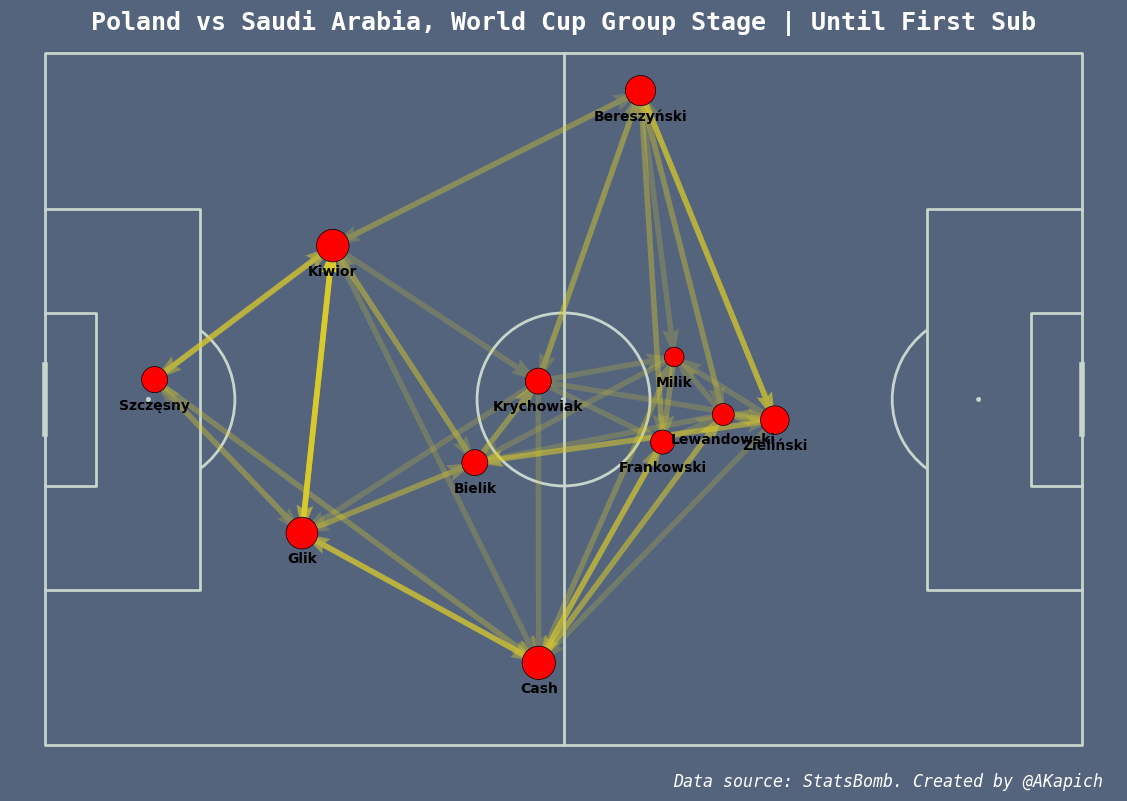

In [464]:
passes_between = passes.groupby(['player', 'recipient']).id.count().reset_index()
# test = passes[pd.isna(passes["recipient"])==False]
# len(test)==sum(passes_between.id) # True
passes_between = passes_between.rename(columns={'id': 'pass_count'})

# 'average_location' index is in fact 'player' column, therefore below right_index=True (we merge by it)
# average_location.index # to see
passes_between = passes_between.merge(average_location,
                                      left_on="player", right_index=True)
passes_between = passes_between.merge(average_location,
                                      left_on='recipient', right_index=True, suffixes=('','_end'))
# setting a threshold for minimum 2 passes between players to be noted on the chart
passes_between = passes_between.loc[(passes_between['pass_count']>1)]

fig ,ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
fig.set_facecolor('#55647d')
ax.patch.set_facecolor('#55647d')
pitch = Pitch(pitch_type='statsbomb', pitch_color='#55647d', line_color='#c7d5cc')
pitch.draw(ax=ax)

arrows = pitch.arrows(passes_between.x, passes_between.y,
                      passes_between.x_end, passes_between.y_end,
                      color='#d9ca2b',
                      alpha=pd.to_numeric(passes_between["pass_count"], downcast="float")/max(passes_between["pass_count"]),
                      ax=ax)
nodes = pitch.scatter(average_location.x, average_location.y,
                      s = pd.to_numeric(average_location["count"], downcast="float")*25,
                      #alpha = pd.to_numeric(average_location["count"], downcast="float")/max(average_location["count"]),
                      color='red', edgecolors='black',
                      ax=ax)

for index, row in average_location.iterrows():
     pitch.annotate(row.name, xy=(row.x, row.y+3),
                    c='black', va='center', ha='center',
                    size=10, fontweight='bold',
                    ax=ax)

ax.set_title("Poland vs Saudi Arabia, World Cup Group Stage | Until First Sub",
             fontsize=18, color="w", fontfamily="Monospace", fontweight='bold', pad=-8)
fig.text(.75,.01,f'Data source: StatsBomb. Created by @AKapich',
         fontstyle='italic', fontsize=12, fontfamily='Monospace', color='w', ha='center')
plt.savefig('pass_network.png', dpi = 500, bbox_inches='tight',facecolor='#55647d')

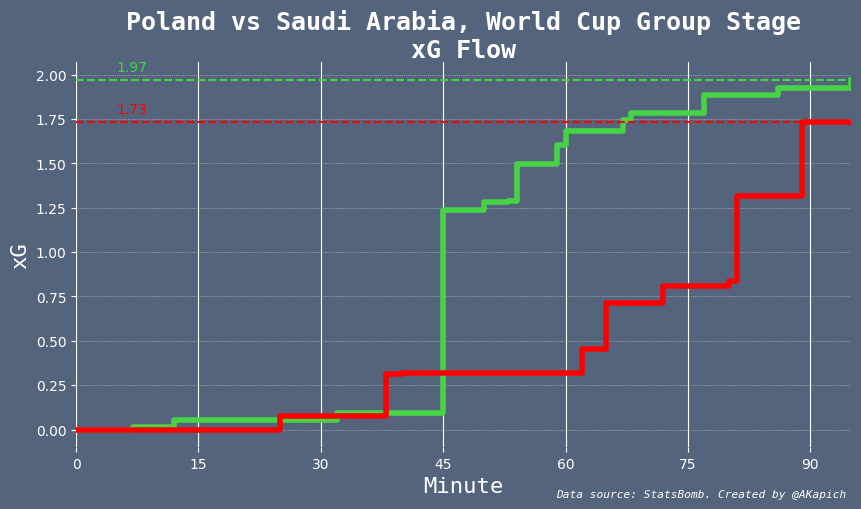

In [595]:
shots = sb.events(match_id=3857297, split=True, flatten_attrs=False)["shots"]
shots.index = range(len(shots))

shots["xG"] = [shots["shot"][i]["statsbomb_xg"] for i in range(len(shots))]
shots["outcome"] = [shots["shot"][i]["outcome"]["name"] for i in range(len(shots))]
shots = shots[["minute", "second", "team", "player", "xG", "outcome"]]

# a - away, h - home
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]

for i in range(len(shots)):
    if shots['team'][i]=="Saudi Arabia":
        a_xG.append(shots['xG'][i])
        a_min.append(shots['minute'][i])
    if shots['team'][i]=="Poland":
        h_xG.append(shots['xG'][i])
        h_min.append(shots['minute'][i])
        
def cumsum(the_list):
    return [sum(the_list[:i+1]) for i in range(len(the_list))]
a_xG = cumsum(a_xG)
h_xG = cumsum(h_xG)

# make the plot finish at the end of an axis for both teams
if(a_min[-1]>h_min[-1]):
    h_min.append(a_min[-1])
    h_xG.append(h_xG[-1])
elif (h_min[-1]>a_min[-1]):
    a_min.append(h_min[-1])
    a_xG.append(a_xG[-1])

a_xG_total = round(a_xG[-1], 2)
h_xG_total = round(h_xG[-1], 2)

mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#55647d')
ax.patch.set_facecolor('#55647d')

ax.step(x=a_min, y=a_xG, color="#46d446", where='post', linewidth=4)
ax.step(x=h_min, y=h_xG, color="red", where='post', linewidth=4)
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Monospace',color='white',fontsize=16)
plt.ylabel('xG',fontname='Monospace',color='white',fontsize=16)

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
# remove the frame of the plot
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
ax.margins(x=0)
plt.axhline(h_xG_total, color="red", linestyle='--')
plt.axhline(a_xG_total, color="#46d446", linestyle='--')
plt.text(5, h_xG_total+0.05, h_xG_total, fontsize = 10, color="red")
plt.text(5, a_xG_total+0.05, a_xG_total, fontsize = 10, color="#46d446")

ax.set_title("Poland vs Saudi Arabia, World Cup Group Stage\nxG Flow",
             fontsize=18, color="w", fontfamily="Monospace", fontweight='bold', pad=-8)
fig.text(.75,.01,f'Data source: StatsBomb. Created by @AKapich',
         fontstyle='italic', fontsize=8, fontfamily='Monospace', color='w', ha='center')

plt.savefig('xG_flow.png', dpi = 500, bbox_inches='tight',facecolor='#55647d')

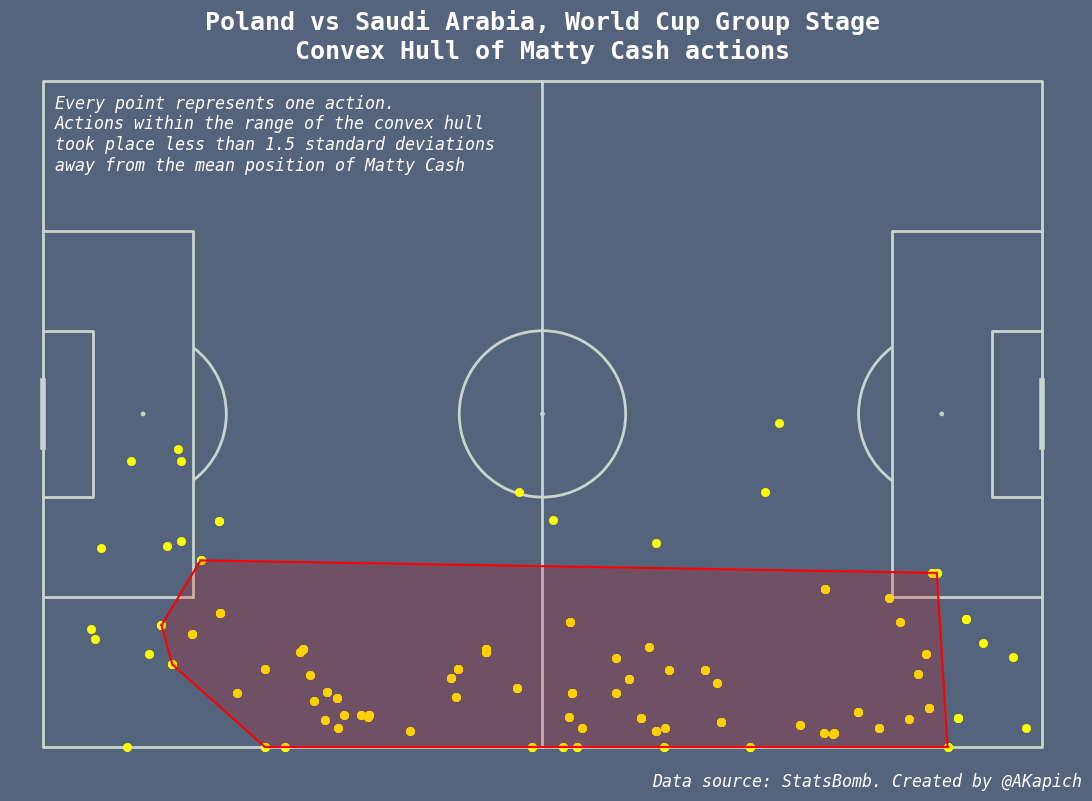

In [514]:
from scipy.spatial import ConvexHull
from scipy import stats

events = sb.events(match_id=3857297)
events = events[events["team"]=="Poland"]

players = events[pd.isna(events["player"])==False]["player"].unique()
starters = players[:11] # first eleven

# single player
fig ,ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
fig.set_facecolor('#55647d')
ax.patch.set_facecolor('#55647d')
pitch = Pitch(pitch_type='statsbomb', pitch_color='#55647d', line_color='#c7d5cc')
pitch.draw(ax=ax)

events = events[pd.isna(events["location"])==False]
events['x'] = [location[0] for location in events.loc[:,"location"]]
events['y'] = [location[1] for location in events.loc[:,"location"]]
cash_events = events[events["player"]=="Matty Cash"]
before_filter = cash_events

# eliminate points that lay over 1.5 standard deviations away from the mean coords
# zscore tells how many standard deviations away the value is from the mean
cash_events = cash_events[np.abs(stats.zscore(cash_events[['x','y']])) < 1.5]
# where the zscore is greater than 1.5 values are set to NaN
cash_events = cash_events[['x','y']][(pd.isna(cash_events['x'])==False)&(pd.isna(cash_events['y'])==False)]
points = cash_events[['x','y']].values

plt.scatter(before_filter.x, before_filter.y, color="yellow")
plt.scatter(cash_events.x, cash_events.y, color='yellow')
# create a convex hull
hull = ConvexHull(cash_events[['x','y']])
for i in hull.simplices:
    plt.plot(points[i, 0], points[i, 1], 'red')
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], c='red', alpha=0.03)

ax.set_title("Poland vs Saudi Arabia, World Cup Group Stage\nConvex Hull of Matty Cash actions",
             fontsize=18, color="w", fontfamily="Monospace", fontweight='bold', pad=-8)
fig.text(.75,.01,f'Data source: StatsBomb. Created by @AKapich',
         fontstyle='italic', fontsize=12, fontfamily='Monospace', color='w', ha='center')
fig.text(.125,.78,'''Every point represents one action.
Actions within the range of the convex hull
took place less than 1.5 standard deviations
away from the mean position of Matty Cash''',
         fontstyle='italic', fontsize=12, fontfamily='Monospace', color='w', ha='left')

plt.savefig('cash_convexHull.png', dpi = 500, bbox_inches='tight',facecolor='#55647d')

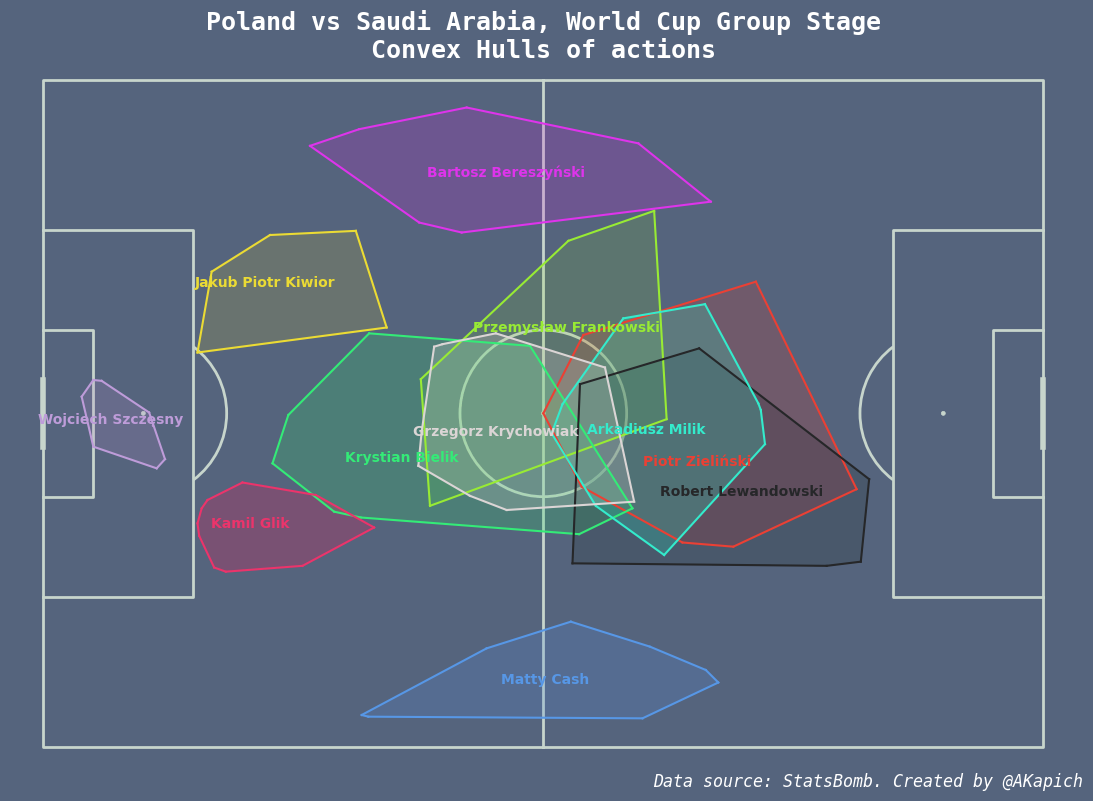

In [545]:
# for every starter
fig ,ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
fig.set_facecolor('#55647d')
ax.patch.set_facecolor('#55647d')
pitch = Pitch(pitch_type='statsbomb', pitch_color='#55647d', line_color='#c7d5cc')
pitch.draw(ax=ax)

colourdict={
    'Piotr Zieliński':'#eb4034',
    'Jakub Piotr Kiwior':'#ebdb34',
    'Przemysław Frankowski':'#98eb34',
    'Krystian Bielik':'#34eb77',
    'Wojciech Szczęsny':'#be9cd9',
    'Matty Cash':'#5797e6',
    'Robert Lewandowski':'#262729',
    'Bartosz Bereszyński':'#de34eb',
    'Kamil Glik':'#eb346b',
    'Arkadiusz Milik':'#34ebcc',
    'Grzegorz Krychowiak':'#dbd5d5'
}

for player in starters:
    tempdf = events[events["player"]==player]
    # threshold of 0.75 sd
    tempdf = tempdf[np.abs(stats.zscore(tempdf[['x','y']])) < 0.75]
    
    tempdf = tempdf[['x','y']][(pd.isna(tempdf['x'])==False)&(pd.isna(tempdf['y'])==False)]
    points = tempdf[['x','y']].values
    
    pitch.annotate(player, xy=(np.mean(tempdf.x), np.mean(tempdf.y)),
                    c=colourdict[player], va='center', ha='center',
                    size=10, fontweight='bold',
                    ax=ax)
    
    try:
        hull = ConvexHull(tempdf[['x','y']])
    except:
        pass
    
    try:
        for i in hull.simplices:
            plt.plot(points[i, 0], points[i, 1], colourdict[player])
            plt.fill(points[hull.vertices,0], points[hull.vertices,1], c=colourdict[player], alpha=0.03)
    except:
        pass

ax.set_title("Poland vs Saudi Arabia, World Cup Group Stage\nConvex Hulls of actions",
             fontsize=18, color="w", fontfamily="Monospace", fontweight='bold', pad=-8)
fig.text(.75,.01,f'Data source: StatsBomb. Created by @AKapich',
         fontstyle='italic', fontsize=12, fontfamily='Monospace', color='w', ha='center')

plt.savefig('convexHull.png', dpi = 500, bbox_inches='tight',facecolor='#55647d')

C:\Users\Aleks\AppData\Local\Temp\ipykernel_26136\1198619323.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'][i] = 120-df['x'][i]
C:\Users\Aleks\AppData\Local\Temp\ipykernel_26136\1198619323.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][i] = 80-df['y'][i]


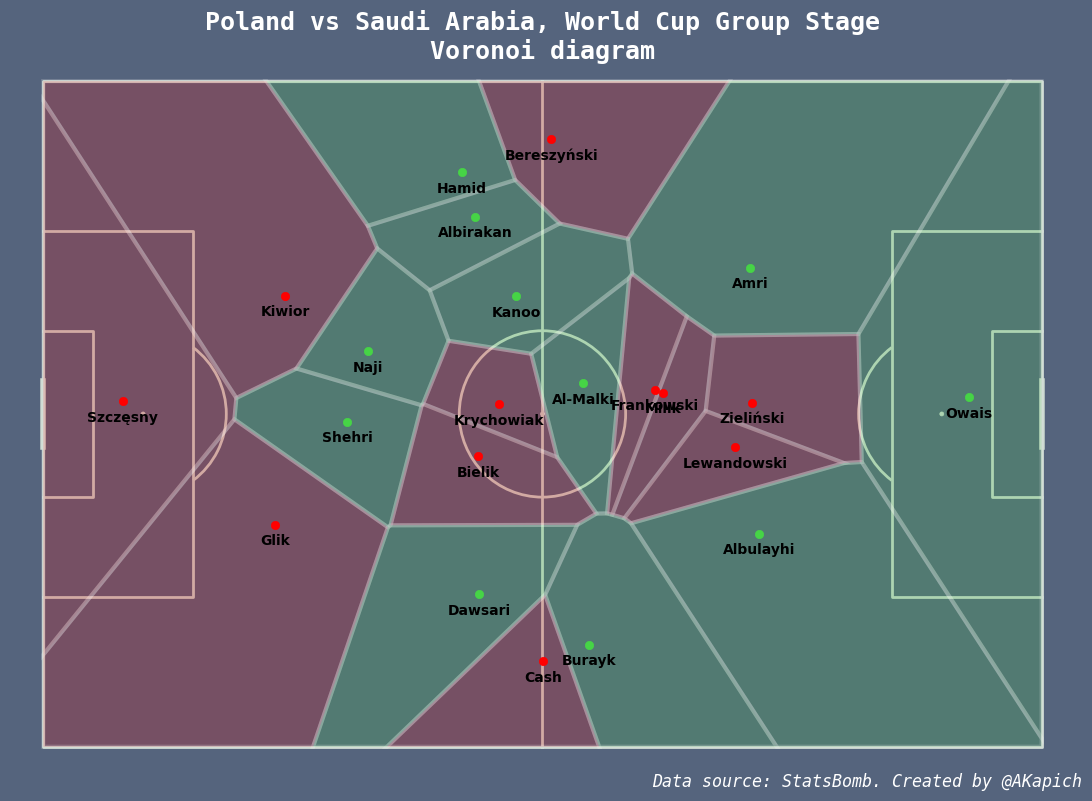

In [619]:
df = sb.events(match_id=3857297)

subs = df[pd.isna(df["substitution_outcome"])==False]
min_threshold = min(subs["minute"])
sec_threshold = min(subs["second"])
df = df[(df["minute"]<min_threshold) | ((df["minute"]==min_threshold) & (df["second"]<sec_threshold))]
df = df[pd.isna(df["location"])==False]
df["x"] = [location[0] for location in df["location"]]
df["y"] = [location[1] for location in df["location"]]
# average location
df = df.groupby(['player', 'team']).agg({'x': ['mean'], 'y': ['mean']})
df.columns = ['x', 'y']
df=df.reset_index()
# the column responsible for voronoi division must be boolean
df['team_id'] = df['team']=='Poland'

# reverse the coords of one team
for i in range(len(df)):
    if not (df['team_id'][i]):
        df['x'][i] = 120-df['x'][i]
        df['y'][i] = 80-df['y'][i]

fig ,ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
fig.set_facecolor('#55647d')
ax.patch.set_facecolor('#55647d')
pitch = Pitch(pitch_type='statsbomb', pitch_color='#55647d', line_color='#c7d5cc')
pitch.draw(ax=ax)

pitch.voronoi(df.x, df.y, df.team)
team1,team2 = pitch.voronoi(df.x, df.y, df.team_id)

t1 = pitch.polygon(team1, ax=ax, fc='red', ec='white', lw=3, alpha=0.2)
t2 = pitch.polygon(team2, ax=ax, fc='#46d446', ec='white', lw=3, alpha=0.2)

# Plot players
for i in range(len(df['x'])):
    if df['team'][i]=='Poland':
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='red')
        
    if df['team'][i]=='Saudi Arabia':
        pitch.scatter(df['x'][i],df['y'][i],ax=ax,color='#46d446')
        
    pitch.annotate(df['player'][i].split(" ")[-1], xy=(df['x'][i], df['y'][i]+2),
                    c='black', va='center', ha='center',
                    size=10, fontweight='bold',
                    ax=ax)

ax.set_title("Poland vs Saudi Arabia, World Cup Group Stage\nVoronoi diagram",
             fontsize=18, color="w", fontfamily="Monospace", fontweight='bold', pad=-8)
fig.text(.75,.01,f'Data source: StatsBomb. Created by @AKapich',
         fontstyle='italic', fontsize=12, fontfamily='Monospace', color='w', ha='center')

plt.savefig('voronoi.png', dpi = 500, bbox_inches='tight',facecolor='#55647d')